In [12]:
from lvmtipo.actors import lvm
from cluplus.proxy import invoke

from lvmagp.images import Image
from plotimg import plot_images

In [14]:
await invoke(lvm.sci.agc.start(), lvm.skyw.agc.start(), lvm.skye.agc.start(), lvm.spec.agc.start())
await invoke(lvm.sci.agc.status(), lvm.skyw.agc.status(), lvm.skye.agc.status(), lvm.spec.agc.status())

#await lvm.sci.agc.reconnect()

[{'east': {'temperature': 46.0,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'center': {'temperature': 48.75,
   'cooler': nan,
   'binning': [1, 1],
   'area': [3208, 2200],
   'state': 'online'}},
 {'west': {'temperature': 46.5,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 46.625,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'},
  'west': {'temperature': 43.625,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}},
 {'east': {'temperature': 44.125,
   'cooler': nan,
   'binning': [1, 1],
   'area': [1600, 1100],
   'state': 'online'}}]

In [4]:
exptime = 10

In [6]:
await lvm.sci.agc.reconnect()

Exception: Failed routing message to consumer 'lvm.sci.agcam'.

['/data/lvm/sci/agcam/east/20230220/lvm.sci.agcam.east_00000017.fits', '/data/lvm/sci/agcam/center/20230220/lvm.sci.agcam.center_00000027.fits']


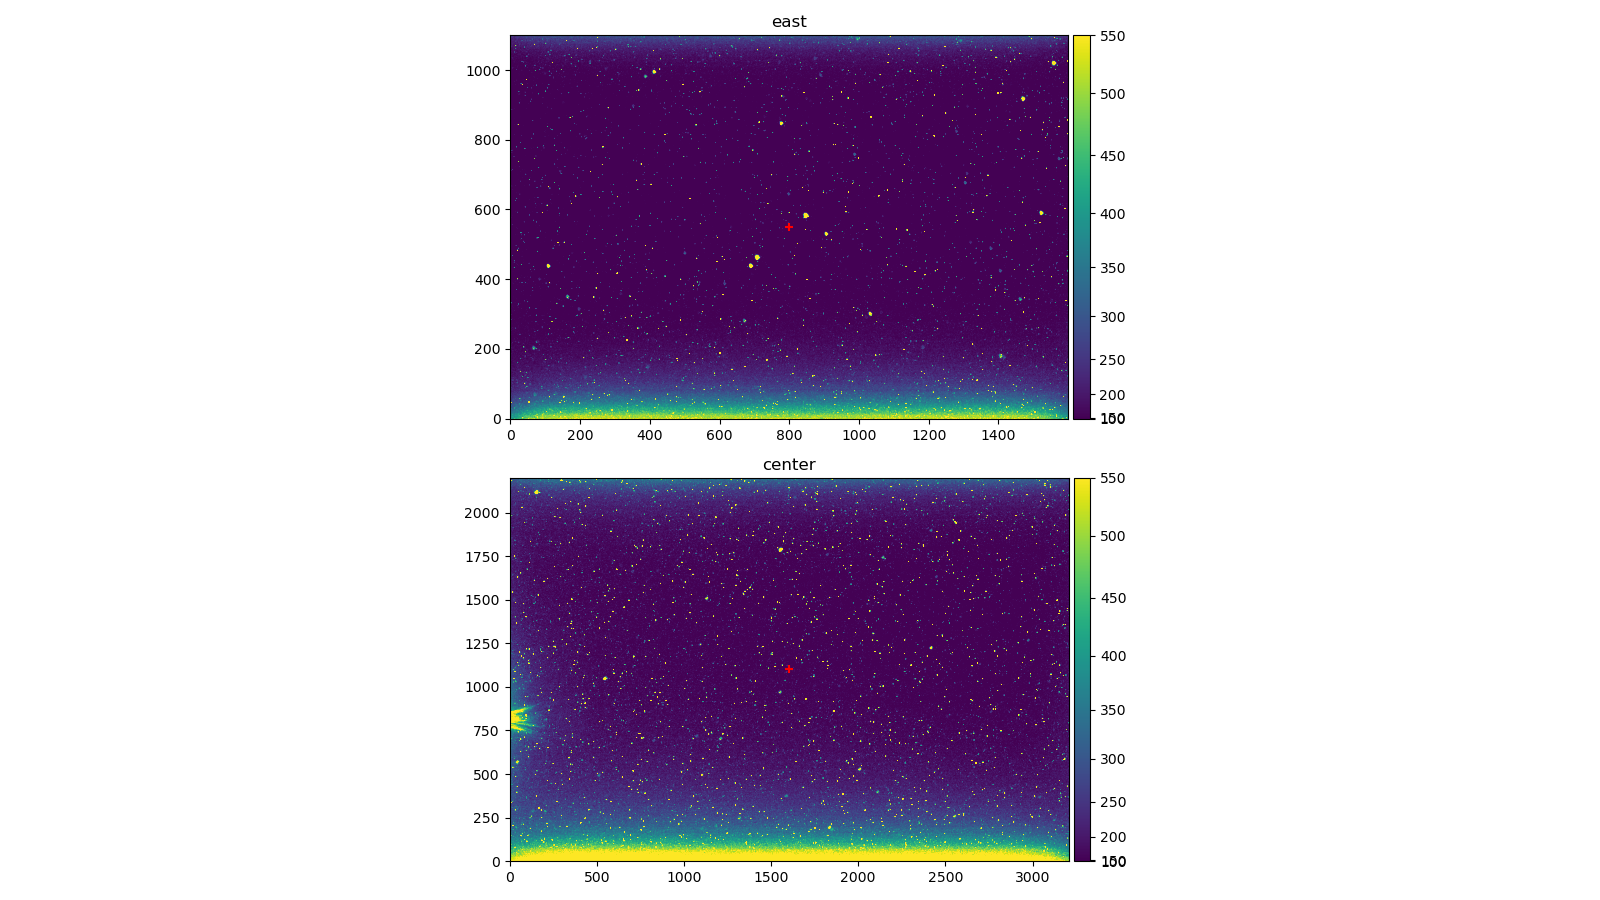

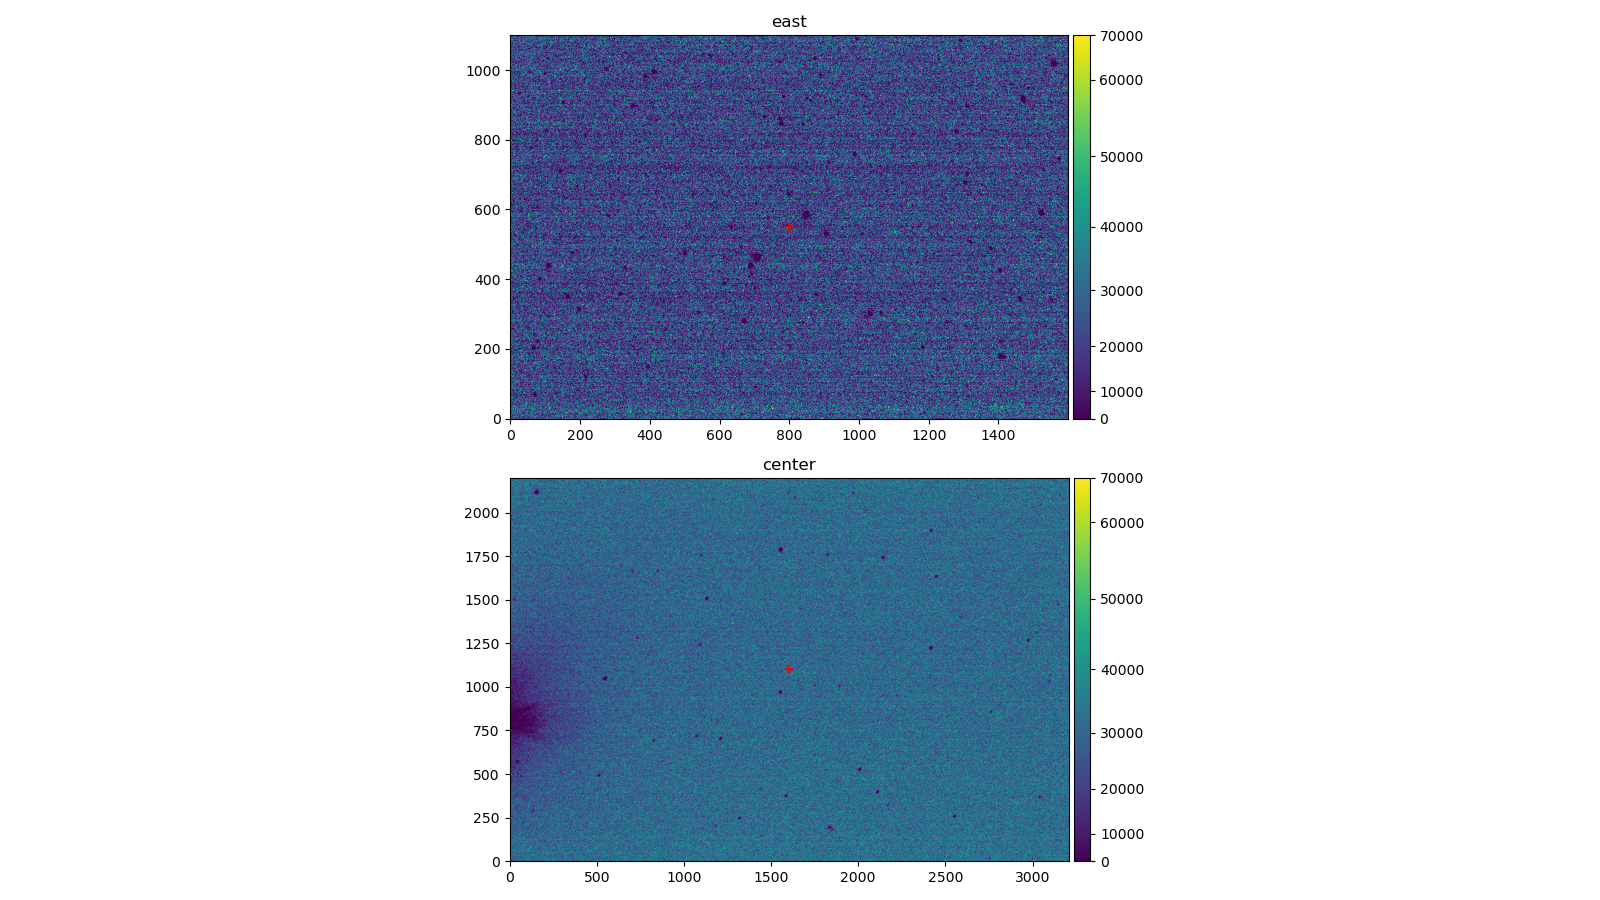

In [20]:
%matplotlib widget

dark = [Image.from_file('/data/lvm/sci/agcam/east/20230220/lvm.sci.agcam.east_00000012.fits'), 
        Image.from_file('/data/lvm/sci/agcam/center/20230220/lvm.sci.agcam.center_00000022.fits')]


rc = await lvm.sci.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
print(filenames)
images = [Image.from_file(f) for f in filenames]
plot_images(images)


#for idx, im in enumerate(images):
    im.data = im.data - dark[idx].data
#img_d = [im.data = im.data - dark[idx].data for idx, im in enumerate(images)]
#plot_images(images)


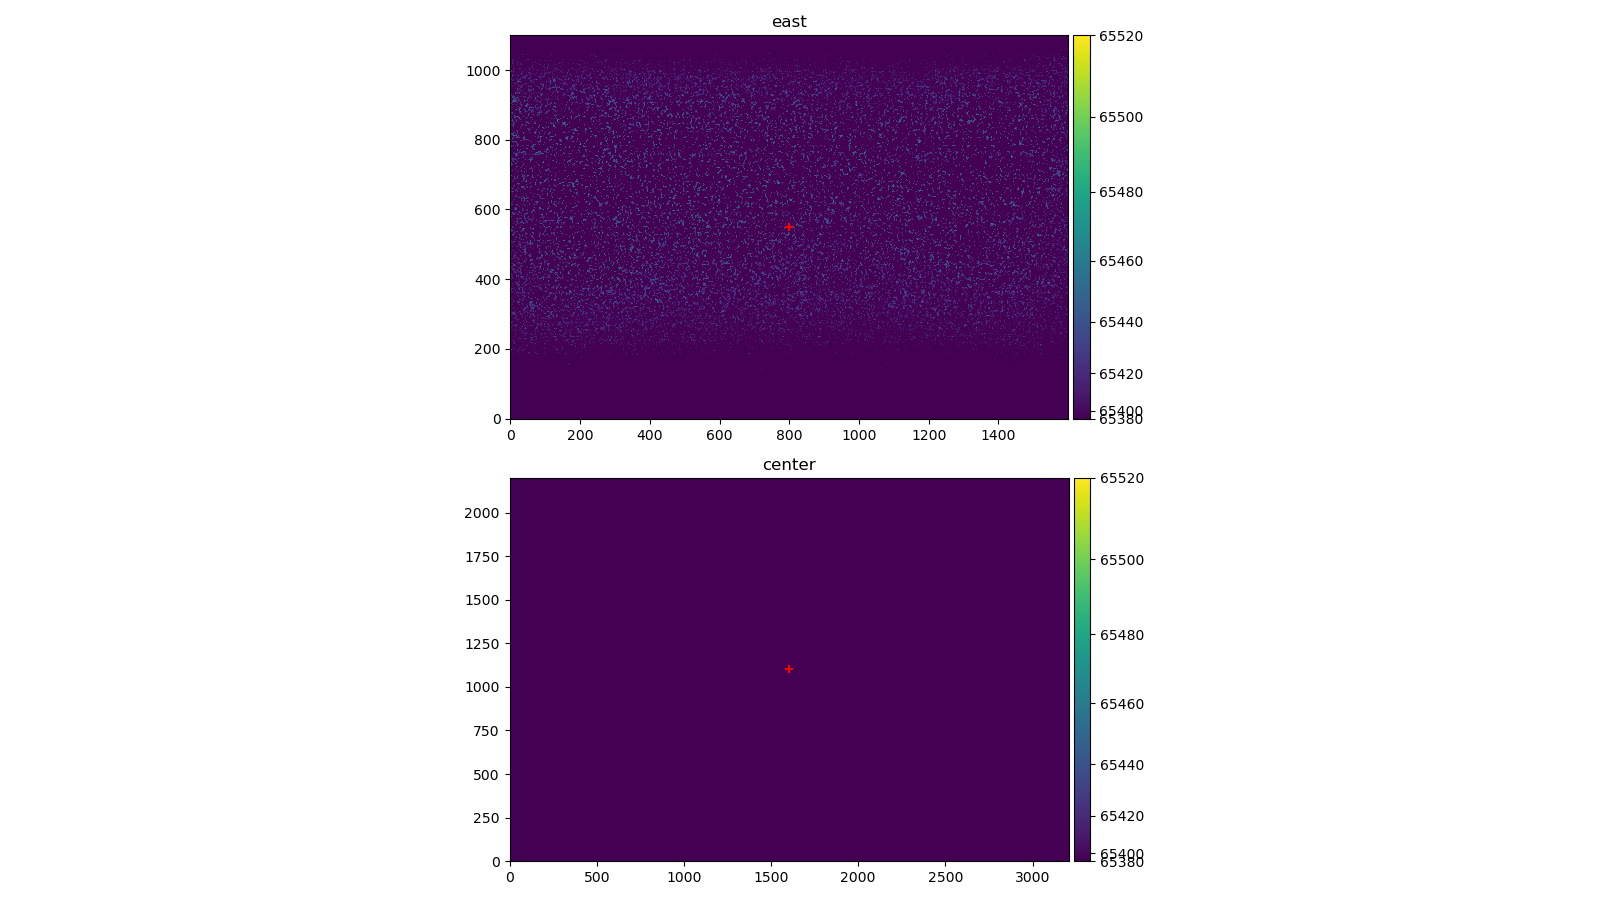

In [19]:
#plot_images(dark)

for idx, im in enumerate(images):
    im.data = im.data - dark[idx].data
#img_d = [im.data = im.data - dark[idx].data for idx, im in enumerate(images)]
plot_images(images)


In [7]:
print(filenames)

/data/lvm/sci/agcam/center/20230220/lvm.sci.agcam.center_00000007.fits


In [5]:
rc = await lvm.skyw.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


Exception: Failed routing message to consumer 'lvm.skyw.agcam'.

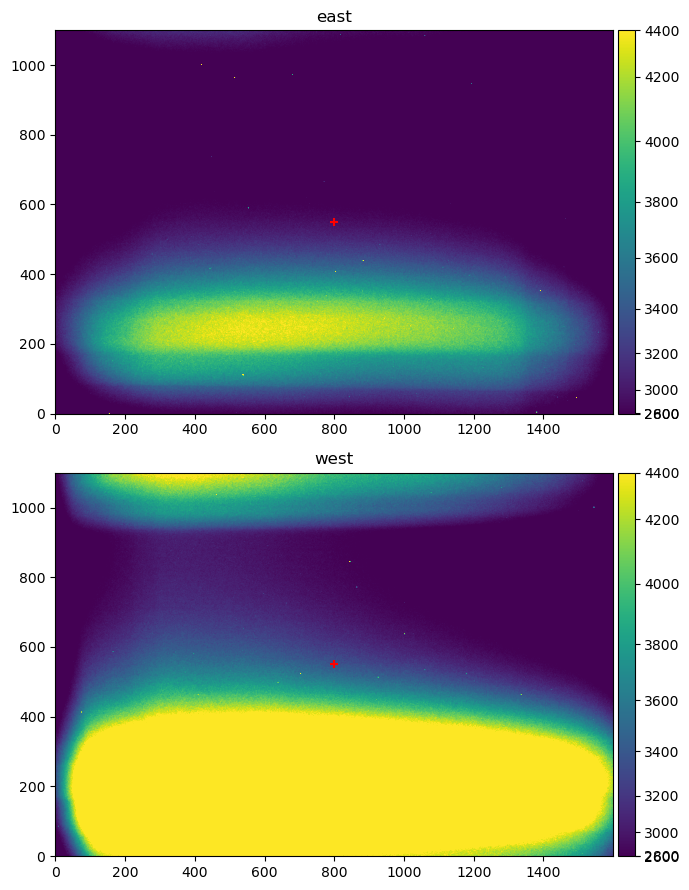

In [16]:
rc = await lvm.skye.agc.expose( exptime)
filenames = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in filenames]
plot_images(images)


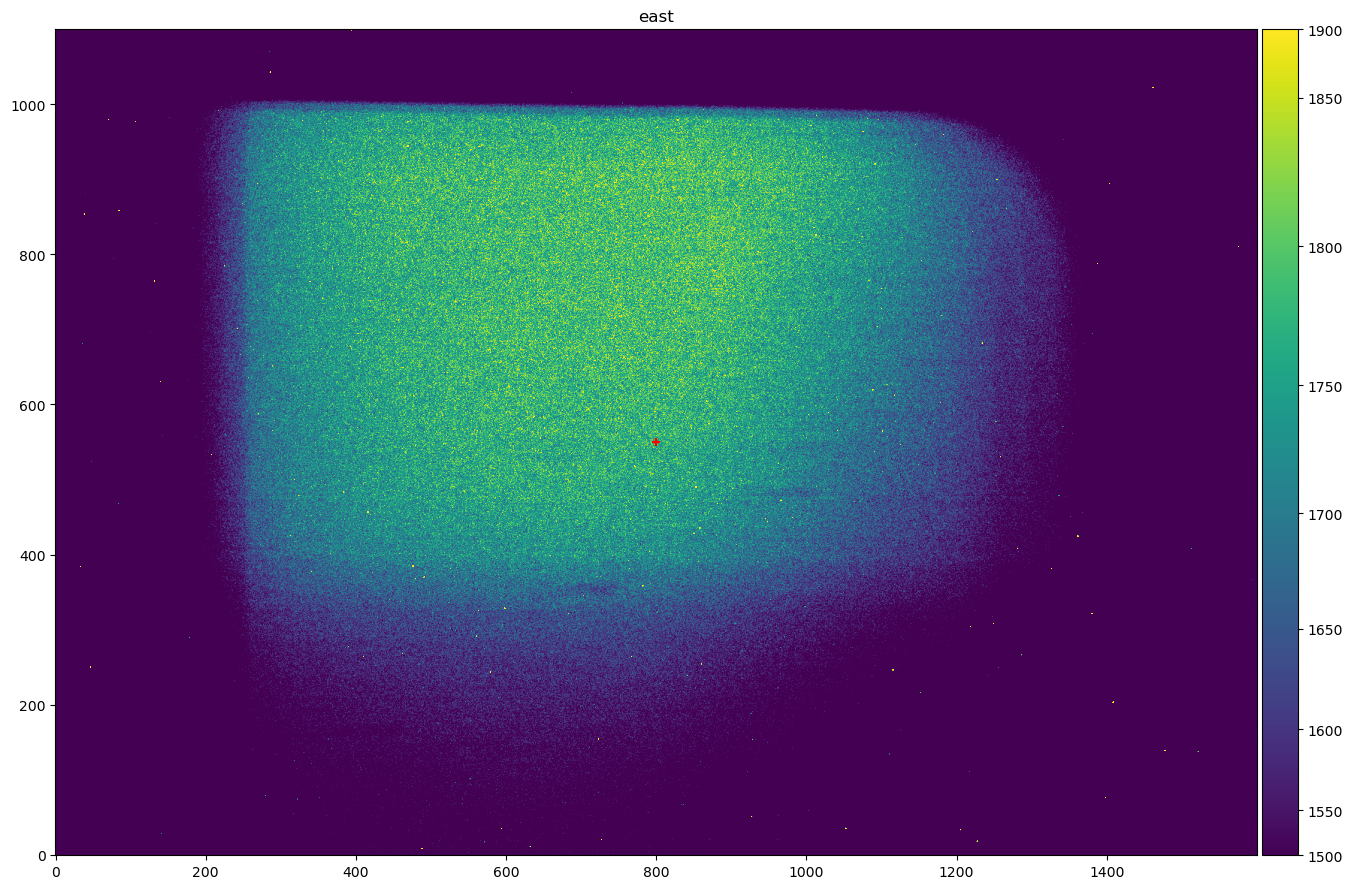

In [17]:
rc = await lvm.spec.agc.expose( exptime)
filename = rc.flatten().unpack("*.filename")
images = [Image.from_file(f) for f in [filename]]
plot_images(images)